# Generating Single Frame PSFs with spike

Some of the utility of `spike` is baked into the fact that it creates PSFs for individual images/coordinates using consistent syntax across a variety of different PSF generation methods. Even outside of cases where a drizzled/resampled PSF would be useful, these image-specific PSFs can be generated quickly and easily.

This example notebook assumes that you have all of the optional PSF generation dependencies installed -- i.e., `TinyTim`, `PSFEx` (and `SExtractor`), and `STPSF` (formerly `WebbPSF`). It uses the following _HST_ and _JWST_ files (also used in generating the Polzin 2025 figures and in the other example notebooks):
- j8pu42ecq_flc.fits (_HST_/ACS; observation ID j8pu42010)
- jw02514162001_03201_00001_nrca2_cal.fits (_JWST_/NIRCam; observation ID jw02514162001_03201_00001_nrca2)

The data used in this example is available for download from [MAST](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html) (via search) or [here](https://uchicago.box.com/s/1a0ip1q4dsdoswpi86630m02275z95j1).

Other than using paths for these data, the syntax is generic and servers as a guide for use with other data.

In [1]:
from spike import psfgen
from spike.tools import objloc, checkpixloc, cutout

# spike will save images of single frame PSFs if 'plot = True', but
# to display output PSFs in this notebook, we'll import the following
import matplotlib.pyplot as plt
import numpy as np

# to demonstrate the save feature and read in output files
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u

The `spike.psfgen` and `spike.tools` functions take image paths as inputs, so we'll define those for our example files below:

In [ ]:
hstimg = '/path/to/j8pu42ecq_flc.fits'
jwstimg = '/path/to/jw02514162001_03201_00001_nrca2_cal.fits'

We'll also define some example objects, which are the locations for which the PSFs will be generated. `spike.tools.objloc` takes as argument sexagecimal or degree coordinates or a Simbad-resolvable target name. (Equivalently, you can feed `spike` an `astropy.SkyCoord` object, though `objloc` handles formatting and target resolution automatically.)

In [3]:
hstobj = objloc('10:00:33.0178 +02:09:52.304')
jwstobj = objloc('10:00:31.432 +02:10:26.29')

Now we'll use `spike.tools.checkpixloc` to get more information about the target in the context of the images -- the output of `spike.tools.checkpixloc` is a list, which follows [X, Y, chip, filter], based on the target coordinates and image headers and WCS. (Equivalently, you can feed `spike` a list that contains those same entries, but as above, `checkpixloc` is intended to handle this automatically, including returning NaNs if the object does not fall within the specified frame.)

In [4]:
hstpos = checkpixloc(coords = hstobj, img = hstimg, inst = 'ACS', camera = 'WFC')
jwstpos = checkpixloc(coords = jwstobj, img = jwstimg, inst = 'NIRCam')

2025-05-12 16:03:13,537 - stpipe - WARNING - /Users/avapolzin/opt/anaconda3/envs/spike/lib/python3.10/site-packages/astropy/wcs/wcs.py:805: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2024-01-06T21:41:23.047' from MJD-BEG.
Set DATE-AVG to '2024-01-06T21:47:54.939' from MJD-AVG.
Set DATE-END to '2024-01-06T21:54:26.831' from MJD-END'.

2025-05-12 16:03:13,538 - stpipe - WARNING - /Users/avapolzin/opt/anaconda3/envs/spike/lib/python3.10/site-packages/astropy/wcs/wcs.py:805: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to    96.501634 from OBSGEO-[XYZ].
Set OBSGEO-B to     8.973245 from OBSGEO-[XYZ].
Set OBSGEO-H to 1686306457.041 from OBSGEO-[XYZ]'.



In [5]:
hstpos, jwstpos

([1020.4395296389423, 181.38330292850168, 2, 'F475W'],
 [536.216683711077, 1095.4223004832825, 'NRCA2', 'F115W'])

From the `checpixloc` outputs, we can see where the target is located on the image (in pix), that for each instrument, the object falls on chip 2, and that the images use F475W (_HST_) and F115W (_JWST_).

Now all that's left is to actually generate the single frame PSFs using `spike.psfgen`. By default, `spike.psf` uses `TinyTim` (_HST_) and `STPSF` (formerly `WebbPSF`; _JWST_ and Roman), so we'll start by generating PSFs with those methods using only the default parameters.

If `writeto = True`, `spike.tools.rewrite_fits` will place the PSF model in the context of the full input image and save it as a .fits file. For this notebook, we will use `writeto = False`, so that no additional outputs are generated beyond those created by the PSF generation methods themselves (e.g., `TinyTim` generates .fits files containing model PSFs in your image directory).

In [6]:
hstpsf = psfgen.tinypsf(coords = hstobj, img = hstimg, imcam = 'ACS/WFC', pos = hstpos, 
                        writeto = False)

2025-05-12 16:03:18,324 - stpipe - WARNING - /var/folders/z4/0z0plfnn1s7fxvtsh_70vwyh0000gn/T/ipykernel_59283/2956791943.py:1: Warning: All of major, minor, and angle must be specified to be applied. Proceeding with no elliptical jitter.



Tiny Tim v7.5
Intermediate PSF dimensions are 464 by 464

Computing PSF for position 1/1 (x,y) = 1020 181
   Computing PSF 1/18 for wavelength 393.82 nm (weight=0.008917)
   Computing PSF 2/18 for wavelength 402.92 nm (weight=0.024755)
   Computing PSF 3/18 for wavelength 412.02 nm (weight=0.037561)
   Computing PSF 4/18 for wavelength 421.11 nm (weight=0.045079)
   Computing PSF 5/18 for wavelength 430.21 nm (weight=0.052658)
   Computing PSF 6/18 for wavelength 439.31 nm (weight=0.056584)
   Computing PSF 7/18 for wavelength 448.41 nm (weight=0.059373)
   Computing PSF 8/18 for wavelength 457.51 nm (weight=0.061140)
   Computing PSF 9/18 for wavelength 466.61 nm (weight=0.064193)
   Computing PSF 10/18 for wavelength 475.70 nm (weight=0.065803)
   Computing PSF 11/18 for wavelength 484.80 nm (weight=0.067198)
   Computing PSF 12/18 for wavelength 493.90 nm (weight=0.069242)
   Computing PSF 13/18 for wavelength 503.00 nm (weight=0.070478)
   Computing PSF 14/18 for wavelength 512.10 

Text(0, 0.5, 'y (pix)')

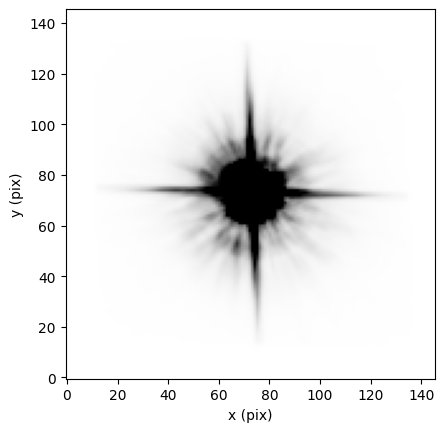

In [7]:
fig = plt.figure()
plt.imshow(hstpsf, vmin = np.nanpercentile(hstpsf, 20), vmax = np.nanpercentile(hstpsf, 97),
            origin = 'lower', cmap = 'Greys')
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')

In [8]:
jwstpsf = psfgen.jwpsf(coords = jwstobj, img = jwstimg, imcam = 'NIRCam', pos = jwstpos, 
                        writeto = False)

Text(0, 0.5, 'y (pix)')

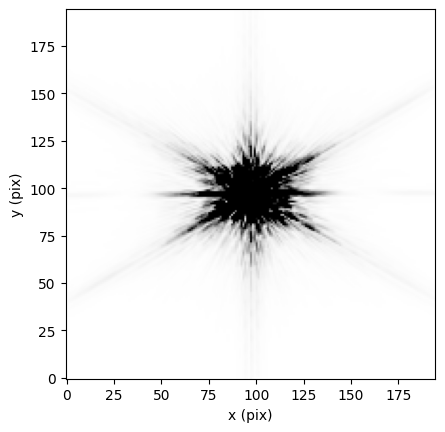

In [9]:
fig = plt.figure()
plt.imshow(jwstpsf, vmin = np.nanpercentile(jwstpsf, 20), vmax = np.nanpercentile(jwstpsf, 97),
            origin = 'lower', cmap = 'Greys')
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')

`spike` gives users complete control over the PSF generation parameters via keyword arguments to `spike.psfgen`. All of the primary options are laid out in the `spike` [documentation](https://spike-psf.readthedocs.io/en/latest/psfgen.html), and many functions take additional arguments that are detailed in the specific documentation for that PSF generation method (e.g., the `STPSF` -- formerly `WebbPSF` --[documentation](https://stpsf.readthedocs.io/en/latest/usage.html#)).

For instance, we can generate a `TinyTim` PSF for an O-type star with T<sub>eff</sub> = 45000 K.

In [10]:
hstpsf = psfgen.tinypsf(coords = hstobj, img = hstimg, imcam = 'ACS/WFC', pos = hstpos, 
                        listchoice = 'O6', temp = 45000, writeto = False)

2025-05-12 16:03:44,727 - stpipe - WARNING - /var/folders/z4/0z0plfnn1s7fxvtsh_70vwyh0000gn/T/ipykernel_59283/1086459123.py:1: Warning: All of major, minor, and angle must be specified to be applied. Proceeding with no elliptical jitter.



Tiny Tim v7.5
Intermediate PSF dimensions are 464 by 464

Computing PSF for position 1/1 (x,y) = 1020 181
   Computing PSF 1/18 for wavelength 393.82 nm (weight=0.018692)
   Computing PSF 2/18 for wavelength 402.92 nm (weight=0.046730)
   Computing PSF 3/18 for wavelength 412.02 nm (weight=0.064174)
   Computing PSF 4/18 for wavelength 421.11 nm (weight=0.070042)
   Computing PSF 5/18 for wavelength 430.21 nm (weight=0.074734)
   Computing PSF 6/18 for wavelength 439.31 nm (weight=0.073655)
   Computing PSF 7/18 for wavelength 448.41 nm (weight=0.071159)
   Computing PSF 8/18 for wavelength 457.51 nm (weight=0.067712)
   Computing PSF 9/18 for wavelength 466.61 nm (weight=0.065917)
   Computing PSF 10/18 for wavelength 475.70 nm (weight=0.062852)
   Computing PSF 11/18 for wavelength 484.80 nm (weight=0.059882)
   Computing PSF 12/18 for wavelength 493.90 nm (weight=0.057730)
   Computing PSF 13/18 for wavelength 503.00 nm (weight=0.055124)
   Computing PSF 14/18 for wavelength 512.10 

Text(0, 0.5, 'y (pix)')

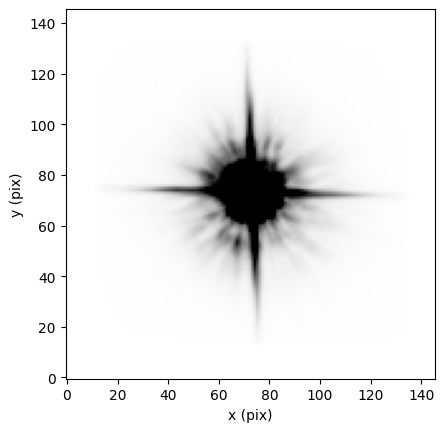

In [11]:
fig = plt.figure()
plt.imshow(hstpsf, vmin = np.nanpercentile(hstpsf, 20), vmax = np.nanpercentile(hstpsf, 97),
            origin = 'lower', cmap = 'Greys')
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')

Empirical PSFs can also be generated for individual frames in this way. Below, we'll use `spike.psfgen.psfex`, which automatically runs both `SExtractor` and `PSFEx` to return a model PSF.

In [12]:
hstpsf = psfgen.psfex(coords = hstobj, img = hstimg, imcam = 'ACS/WFC', pos = hstpos, 
                        writeto = False)

> 
----- SExtractor 2.28.0 started on 2025-05-12 at 16:03:54 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing catalog
> Looking for j8pu42ecq_flc_mask.fits
----- Measuring from: j8pu42ecq_flc_mask.fits [1/3]
      "Unnamed" / no ext. header / 4096x2048 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
> Setting up background map at line:  832
> Setting up background map at line:  896
> Setting up background map at line:  960
> S

Text(0, 0.5, 'y (pix)')

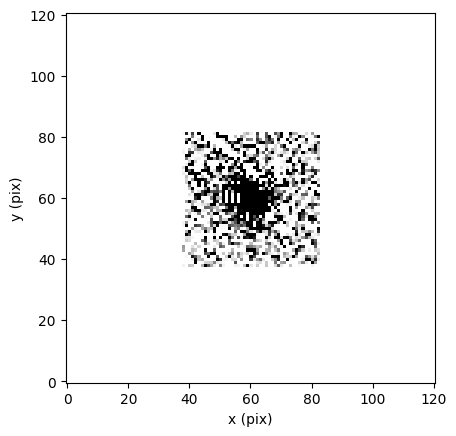

In [13]:
fig = plt.figure()
plt.imshow(hstpsf, vmin = np.nanpercentile(hstpsf, 20), vmax = np.nanpercentile(hstpsf, 97),
            origin = 'lower', cmap = 'Greys')
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')

And the same for _JWST_:

In [14]:
jwstpsf = psfgen.psfex(coords = jwstobj, img = jwstimg, imcam = 'NIRCam', pos = jwstpos, 
                        writeto = False)

> 
----- SExtractor 2.28.0 started on 2025-05-12 at 16:04:09 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing catalog
> Looking for jw02514162001_03201_00001_nrca2_cal_mask.fits
----- Measuring from: jw02514162001_03201_00001_nrca2_cal_mask.fits [1/3]
      "Unnamed" / no ext. header / 2048x2048 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
> Setting up background map at line:  832
> Setting up background map at line:  896
>

Text(0, 0.5, 'y (pix)')

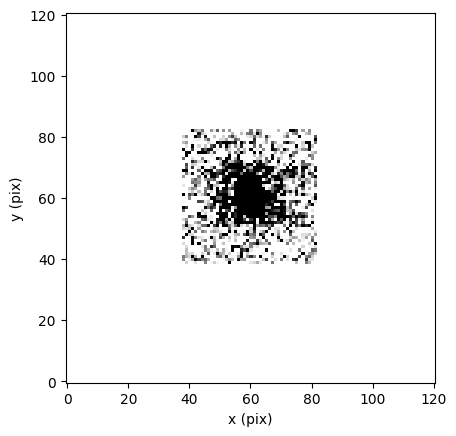

In [15]:
fig = plt.figure()
plt.imshow(jwstpsf, vmin = np.nanpercentile(jwstpsf, 20), vmax = np.nanpercentile(jwstpsf, 97),
            origin = 'lower', cmap = 'Greys')
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')

In each case, the inputs and required arguments for the PSF generation functions are the same, and the `spike.psfgen` functions automates much of the innate complication of these PSF generation methods.

To now, the examples haven't specifically written a model PSF to a dedicated .fits file. In the next cell, we'll work through an entire example for an STDPSF, which includes just such an output file. `spike` will place the PSF in the context of the input image, so we'll use `spike.tools.cutout` extract the region around the PSF itself. If `spike.tools.cutout(*, save = True)`, a new .fits file will be generated that is cropped to the position of the PSF,while preserving the WCS of the original image.

In [16]:
hstobj = objloc('10:00:33.0178 +02:09:52.304')

hstpos = checkpixloc(coords = hstobj, img = hstimg, inst = 'ACS', camera = 'WFC')

hstpsf = psfgen.stdpsf(coords = hstobj, img = hstimg, imcam = 'ACS/WFC', pos = hstpos, 
                        writeto = True)

Text(0, 0.5, 'y (pix)')

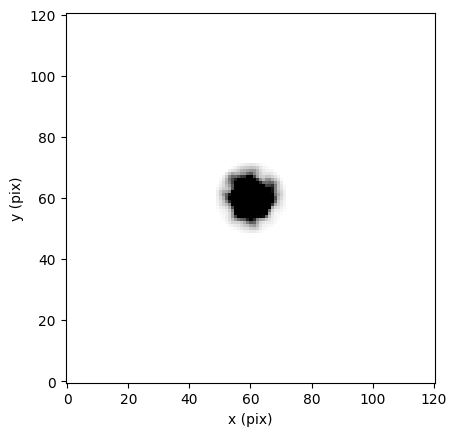

In [17]:
fig = plt.figure()
plt.imshow(hstpsf, vmin = np.nanpercentile(hstpsf, 20), vmax = np.nanpercentile(hstpsf, 99),
            origin = 'lower', cmap = 'Greys')
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')

Now we'll read in the full PSF model that was saved:

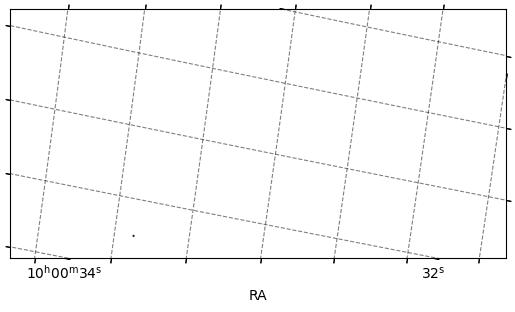

In [ ]:
modelpath = hstimg.split('j8pu42ecq_flc')[0]+'j8pu42ecq_150d08m15.267s+2d09m52.304s_F475W_topsf_flc.fits'
psfimg = fits.open(modelpath)

psfmod = psfimg[1].data
psfwcs = WCS(psfimg[1].header, psfimg)

fig = plt.figure()
plt.subplot(projection=psfwcs)
ax = plt.gca()
ax.coords[0].set_ticks(spacing = 30*u.arcsec)
ax.coords[1].set_ticks(spacing = 30*u.arcsec)
plt.imshow(psfmod, vmin = np.nanpercentile(psfmod[psfmod != 0], 20), 
           vmax = np.nanpercentile(psfmod[psfmod != 0], 75), 
           origin = 'lower', cmap = 'Greys')
plt.grid(color='k', ls='--', alpha = 0.5)
plt.xlabel('RA')
plt.ylabel('Dec')

We can then crop the PSF using `spike.tools.cutout`. `cutout` will also output an array that contains the cropped region, but we'll read it in to demonstrate that the WCS is preserved. The default FOV is 120 pix x 120 pix.

In [19]:
psfcrop = cutout(img = modelpath, coords = hstobj, save = True)

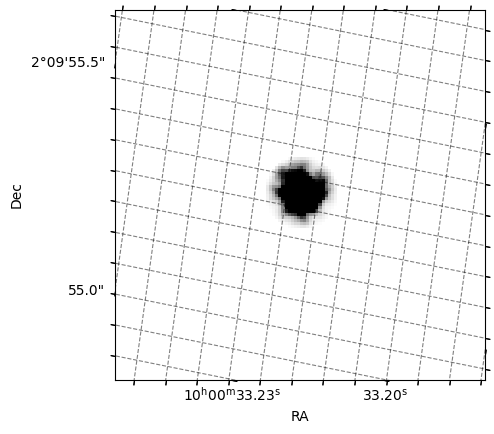

In [ ]:
modelpath = hstimg.split('j8pu42ecq_flc')[0]+'j8pu42ecq_150d08m15.267s+2d09m52.304s_F475W_topsf_crop_flc.fits'
psfimg = fits.open(modelpath)

psfmod = psfimg[1].data
psfwcs = WCS(psfimg[1].header, psfimg)

fig = plt.figure()
plt.subplot(projection=psfwcs)
ax = plt.gca()
ax.coords[0].set_ticks(spacing = 0.5*u.arcsec)
ax.coords[1].set_ticks(spacing = 0.5*u.arcsec)
plt.imshow(psfmod, vmin = np.nanpercentile(psfmod[psfmod != 0], 20), 
           vmax = np.nanpercentile(psfmod[psfmod != 0], 75), 
           origin = 'lower', cmap = 'Greys')
plt.grid(color='k', ls='--', alpha = 0.5)
plt.xlabel('RA')
plt.ylabel('Dec')